In [ ]:
from pyfaidx import Faidx

INPUT_FASTA_FILE_PATH = '/cs/phd/nadavb/cafa_project/data/uniref90.fasta'

seqs_faidx = Faidx(INPUT_FASTA_FILE_PATH)

In [27]:
import json
import pandas as pd
import sqlite3
from datetime import datetime

N_SEQS_TO_READ = 5000
ANNOTATIONS_SQLITE_FILE_PATH = '/cs/phd/nadavb/cafa_project/data/protein_annotations.db'

def load_data():

    print('Loading %s GO annotations...' % N_SEQS_TO_READ)
    cnx = sqlite3.connect(ANNOTATIONS_SQLITE_FILE_PATH)
    print(datetime.now())
    go_annots = pd.read_sql_query('SELECT * FROM protein_annotations' + ('' if N_SEQS_TO_READ is None else \
            (' ORDER BY RANDOM() LIMIT %d' % N_SEQS_TO_READ)), cnx)
    print(datetime.now())
    print('Loaded %d GO annotations (%d columns: %s)' % (go_annots.shape + (', '.join(go_annots.columns),)))

    print('Loading Faidx (%s)...' % INPUT_FASTA_FILE_PATH)
#     seqs_faidx = Faidx(INPUT_FASTA_FILE_PATH)
    print('Finished loading Faidx.')

    loaded_seqs = []
    loaded_annotations = []

    for _, (uniprot_id, raw_annotations) in go_annots[['uniprot_name', 'complete_go_annotation_indices']].iterrows():

        seq_fasta_id = 'UniRef90_%s' % uniprot_id.split('_')[0]

        try:
            seq = str(seqs_faidx.fetch(seq_fasta_id, 1, seqs_faidx.index[seq_fasta_id].rlen))
            loaded_seqs.append(seq)
            loaded_annotations.append(json.loads(raw_annotations))
        except KeyError:
            print('Sequence ID %s was not found in the FASTA file.' % seq_fasta_id)

    assert len(loaded_seqs) == len(loaded_annotations)
    print('Successfully loaded %d sequences with annotations (of %d).' % (len(loaded_seqs), len(go_annots)))
    return loaded_seqs, loaded_annotations

loaded_seqs, loaded_annotations = load_data()

Loading 5000 GO annotations...


AttributeError: module 'datetime' has no attribute 'now'

(array([1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 4.978e+03]),
 array([2.161368  , 2.2263887 , 2.2914094 , 2.3564301 , 2.4214508 ,
        2.4864715 , 2.5514922 , 2.6165129 , 2.68153361, 2.74655431,
        2.81157501]),
 <a list of 10 Patch objects>)

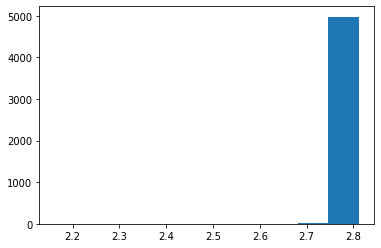

In [25]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(np.log10(list(map(len, loaded_seqs))))